In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_file_path = "D:/Documentos/Polito/Thesis/Datasets/A3LIS-147_italian/trimmed-10.csv"

df = pd.read_csv(csv_file_path, index_col=0)
df.head(10)

,signer_id,name,sign_id,label,test_set,seconds
0,0,fal,0,abbonamento,False,1.72
1,0,fal,1,abitare,False,1.24
2,0,fal,2,acqua,False,1.32
3,0,fal,3,affitto,False,1.68
4,0,fal,5,allergia,False,1.96
5,0,fal,6,ambulanza,False,1.72
6,0,fal,7,amministrazione,False,1.64
7,0,fal,8,ancona,False,2.00
8,1,fef,1,abitare,False,0.92
9,1,fef,2,acqua,False,0.76


In [4]:
df.loc[df.name=='msf']

,signer_id,name,sign_id,label,test_set,seconds
72,9,msf,0,abbonamento,False,1.80
73,9,msf,1,abitare,False,1.08
74,9,msf,2,acqua,False,1.04
75,9,msf,3,affitto,False,1.40
76,9,msf,5,allergia,False,1.84
77,9,msf,6,ambulanza,False,1.24
78,9,msf,7,amministrazione,False,2.72
79,9,msf,8,ancona,False,1.48
98,9,msf,4,allegare,True,1.44
99,9,msf,9,andata,True,1.08


In [5]:
SIGNERS = ['fal', 'fef', 'fsf', 'mdp', 'mdq', 'mic', 'mmr', 'mrla', 'mrlb', 'msf']
with open('../SIGNS.txt') as f:
    SIGNS = f.readlines()
f.close()
SIGNS = [x.strip('\n') for x in SIGNS[:10]]

In [6]:
average_time = np.round(np.mean(df['seconds']), 3)

average_times = {'overall': average_time, 'per_signer':{}, 'per_sign':{}}
for signer in SIGNERS:
    average_times['per_signer'][signer] = np.round(np.mean(df.loc[df.name == signer]['seconds']), 3)

for sign in SIGNS:
    average_times['per_sign'][sign] = np.round(np.mean(df.loc[df.label == sign]['seconds']), 3)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10944\1707507895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux.sort_values(by='name', inplace=True)


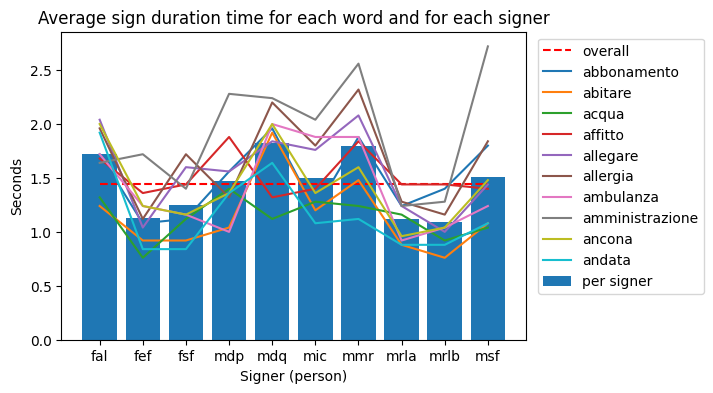

In [7]:
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(SIGNERS, list(average_times['per_signer'].values()), label='per signer')
ax.plot(SIGNERS, [average_times['overall']]*len(SIGNERS), '--r', label='overall')
for sign in SIGNS:
    df_aux = df.loc[df.label==sign]
    df_aux.sort_values(by='name', inplace=True)
    ax.plot(df_aux.name, df_aux.seconds, label=sign)
ax.set_title("Average sign duration time for each word and for each signer")
ax.set_ylabel("Seconds")
ax.set_xlabel("Signer (person)")
ax.legend(bbox_to_anchor=(1.01, 1))